In [1]:
import os
os.chdir("../")

import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

import geopandas as gpd
import shapely

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Austria Grand Prix circuits geojson
at = gpd.read_file("https://raw.githubusercontent.com/bacinger/f1-circuits/master/circuits/at-1969.geojson")
at.explore()

In [3]:
session = ff1.get_session(2021, 9, "R")
print(session.event)

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/czhang/Library/Caches/fastf1.
	Size: 116.49 MB


RoundNumber                                                        9
Country                                                      Austria
Location                                                   Spielberg
OfficialEventName    FORMULA 1 BWT GROSSER PREIS VON ÖSTERREICH 2021
EventDate                                        2021-07-04 00:00:00
EventName                                        Austrian Grand Prix
EventFormat                                             conventional
Session1                                                  Practice 1
Session1Date                               2021-07-02 11:30:00+02:00
Session1DateUtc                                  2021-07-02 09:30:00
Session2                                                  Practice 2
Session2Date                               2021-07-02 15:00:00+02:00
Session2DateUtc                                  2021-07-02 13:00:00
Session3                                                  Practice 3
Session3Date                      

In [4]:
session.load()
lap = session.laps.pick_driver("VER")
tel = lap.get_telemetry()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '4', '44', '55', '11', '3', '16', '10', '14', '63', '22', '18', '99', '7', '6', '5', '47', '9', '31']


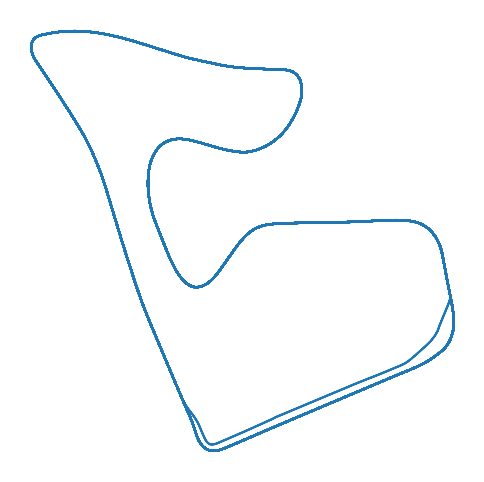

In [5]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y)
ax.set_axis_off();

In [7]:
from shapely.geometry import shape
at_shape = shape(at["geometry"][0])
at_points = [*at_shape.coords]
print(at_points)

[(14.765119, 47.220023), (14.763977, 47.219817), (14.761148, 47.219294), (14.760953, 47.219284), (14.760823, 47.219364), (14.760604, 47.219652), (14.759911, 47.220288), (14.759159, 47.221014), (14.758568, 47.221655), (14.758029, 47.222287), (14.757147, 47.223593), (14.756904, 47.223941), (14.756531, 47.224351), (14.755957, 47.224828), (14.755004, 47.225478), (14.754122, 47.226077), (14.754069, 47.226157), (14.754075, 47.226242), (14.754176, 47.226284), (14.754407, 47.226312), (14.755129, 47.226369), (14.755851, 47.226388), (14.756597, 47.226383), (14.757307, 47.226336), (14.75813, 47.226246), (14.760645, 47.225916), (14.761793, 47.225813), (14.764273, 47.225742), (14.764475, 47.225695), (14.764599, 47.225601), (14.764646, 47.225497), (14.764634, 47.225388), (14.764569, 47.225285), (14.764321, 47.225044), (14.764125, 47.224884), (14.763764, 47.224667), (14.763368, 47.224521), (14.762888, 47.224413), (14.762367, 47.224356), (14.761823, 47.22438), (14.75971, 47.224611), (14.759426, 47.224

## To be solved !!!
How to convert `tel[x]` and `tel[y]` to the coordinates?